In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


By using the equation from [1]:
$$
x_i(t+1) = \sum_{j=1}^{n} W_{ij} C_i x_j(t)
$$


[1] M. Ye, J. Liu, L. Wang, B. D. O. Anderson, and M. Cao, “Consensus and Disagreement of
Heterogeneous Belief Systems in Influence Networks,” IEEE Transactions on Automatic
Control, vol. 65, no. 11, pp. 4679–4694, Nov. 2020. [Online]. Available:
https://ieeexplore.ieee.org/document/8941271/

In [12]:
c = np.array([
    np.array([
    [0.8, -0.2],
    [-0.4, 0.6]
]),
    np.array([
    [0.8, 0.2],
    [0.4, 0.6]
])
])

x = np.array([
    np.array([
    [1],
    [-0.3]
]),
np.array([
    [-0.9],
    [-0.8]
])
])

w1 = np.array([
    [0.9, 0.1],
    [0.1, 0.9]
])

w2 = np.array([
    [0.9, 0.1],
    [0.8, 0.2]
])

w3 = np.array([
    [1, 0],
    [0.1, 0.9]
])

In [13]:
def belief_dynamic(t, w, x=x, c=c) -> pd.DataFrame:
    df = pd.DataFrame(columns=["t", "x1_0", "x1_1", "x2_0", "x2_1"])
    
    x = [x[0].copy(), x[1].copy()]
    
    df = pd.concat([df, pd.DataFrame({
        "t": [0],
        "x1_0": [float(x[0][0,0])], "x1_1": [float(x[0][1,0])],
        "x2_0": [float(x[1][0,0])], "x2_1": [float(x[1][1,0])]
    })], ignore_index=True)
    
    for step in range(1, t+1):
        old_x0, old_x1 = x[0], x[1]
        
        
        new_x0 = w[0, 0] * (c[0] @ old_x0) + w[0, 1] * (c[1] @ old_x1)
        new_x1 = w[1, 0] * (c[0] @ old_x0) + w[1, 1] * (c[1] @ old_x1)
        x = [new_x0, new_x1]
        
        df = pd.concat([df, pd.DataFrame({
            "t": [step],
            "x1_0": [float(x[0][0,0])], "x1_1": [float(x[0][1,0])],
            "x2_0": [float(x[1][0,0])], "x2_1": [float(x[1][1,0])]
        })], ignore_index=True)

    return df

In [14]:
belief_dynamic(5, w1)

,t,x1_0,x1_1,x2_0,x2_1
0,0,1.000000,-0.300000,-0.900000,-0.800000
1,1,0.686000,-0.606000,-0.706000,-0.814000
2,2,0.530240,-0.651280,-0.587840,-0.757520
3,3,0.436826,-0.611542,-0.504154,-0.680970
4,4,0.370640,-0.548514,-0.438388,-0.603384
5,5,0.318455,-0.483367,-0.383627,-0.531384


In [15]:
belief_dynamic(5, w2)

,t,x1_0,x1_1,x2_0,x2_1
0,0,1.000000,-0.300000,-0.900000,-0.800000
1,1,0.686000,-0.606000,0.512000,-0.632000
2,2,0.631320,-0.591640,0.592640,-0.545280
3,3,0.597551,-0.555772,0.571718,-0.504032
4,4,0.565933,-0.522608,0.542670,-0.472733
5,5,0.535500,-0.492602,0.513732,-0.445265


In [16]:
belief_dynamic(5, w3)

,t,x1_0,x1_1,x2_0,x2_1
0,0,1.000000,-0.300000,-0.900000,-0.800000
1,1,0.860000,-0.580000,-0.706000,-0.814000
2,2,0.804000,-0.692000,-0.574440,-0.762920
3,3,0.781600,-0.736800,-0.472762,-0.692455
4,4,0.772640,-0.754720,-0.387767,-0.619592
5,5,0.769056,-0.761888,-0.313813,-0.550365


In [17]:
def plot(dfs):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # 一行三列子图，共享 y 轴

    
    titles = ['W1', 'W2', 'W3']
    for ax, df, title in zip(axes, dfs, titles):
        # x1 两个分量 -> 蓝色
        ax.plot(df["t"], df["x1_0"], color="tab:blue", marker="o", label="x1[1]")
        ax.plot(df["t"], df["x1_1"], color="tab:blue", marker="s", linestyle="--", label="x1[2]")

        # x2 两个分量 -> 红色
        ax.plot(df["t"], df["x2_0"], color="tab:red", marker="o", label="x2[1]")
        ax.plot(df["t"], df["x2_1"], color="tab:red", marker="s", linestyle="--", label="x2[2]")

        ax.set_xlabel("Time step t")
        ax.set_title(title)
        ax.grid(True)

    axes[0].set_ylabel("State value")
    axes[0].legend(loc="best")

    plt.tight_layout()
    plt.show()

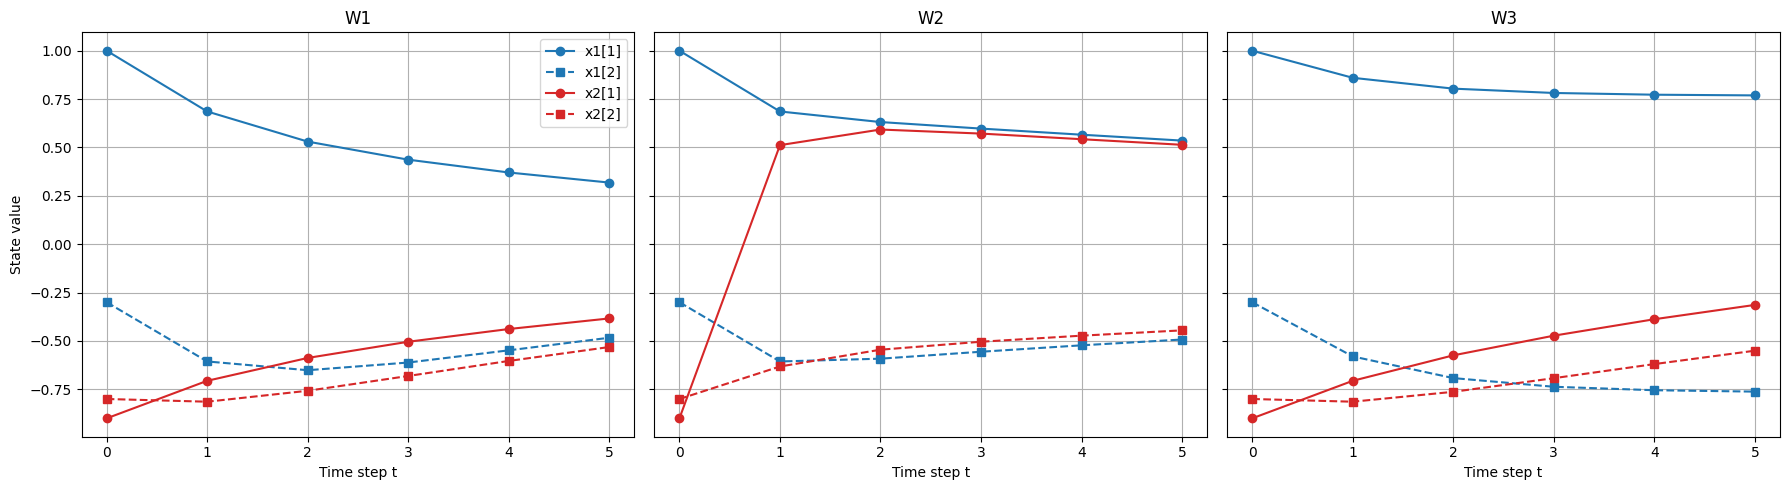

In [18]:
plot(
    [belief_dynamic(5, w1),
     belief_dynamic(5, w2),
     belief_dynamic(5, w3)]
)